# Part I - 201902-fordgobike-tripdata
## Edidiong Godwin Umoh

## Introduction
> The information provided encompasses information regarding 183,412 rides that were completed through a bike-sharing initiative that serves the broader region of San Francisco Bay. Along with the length of each ride (measured in seconds), the data also includes attributes such as the date and time of each trip, the type of customer who used the service, the gender of the rider, and several other variables.


## Data Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading my Dataset(fordgobike-Tripdata)

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### DataFrame Wrangling and Analysis

> The given dataframe includes information about the longitude and latitude coordinates of the locations, which allows us to determine the distance between the starting and ending stations. The Haversine function will be utilized to compute this distance.

In [6]:
# to calculate the distance between the two geolocations
import haversine as hs
from haversine import Unit

In [7]:
def haversine(lat1, long1, lat2, long2):
    """
    This function takes in the two locations by their longitude and lattitude then
    uses the haversine module to calculate the distance between them
    """
    loc1 = (lat1, long1)
    loc2 = (lat2, long2)
    
    
    
    return hs.haversine(loc1, loc2, unit=Unit.MILES)

In [8]:
# Calculating the distance(in miles) between the various start and end points
df['distance_miles'] = df.apply( lambda x : haversine(x['start_station_latitude'], x['start_station_longitude'],  x['end_station_latitude'], x['end_station_longitude']), axis=1)

In [9]:
# Checking the dataframe to see changes
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.338467
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.083051


In [10]:
# Converting the duration of the trips in seconds to hours (1 hour = 3600s)
df['duration_hrs'] = df.apply(lambda x : x['duration_sec'] / 3600, axis=1)

> With knowledge of both the distance and time taken for each trip, we are able to compute the speed of the journey using the formula: speed = distance / time.

In [11]:
df['speed_mph'] = df['distance_miles'] / df['duration_hrs']

In [12]:
df.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_miles,duration_hrs,speed_mph
92043,135,2019-02-15 20:23:50.9180,2019-02-15 20:26:06.4580,343.0,Bryant St at 2nd St,37.783172,-122.393572,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,6124,Subscriber,1989.0,Male,No,0.406917,0.037500,10.851127
58309,1246,2019-02-21 06:47:29.8920,2019-02-21 07:08:16.6430,25.0,Howard St at 2nd St,37.787522,-122.397405,136.0,23rd St at San Bruno Ave,37.754436,-122.404364,4835,Subscriber,1968.0,Male,No,2.317417,0.346111,6.695587


In [13]:
# Converting the start time and end times into datetime objects
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [14]:
# Converting usertype, member_gender and bikeshare_for_all_trip into categorical data
df["user_type"] = df.user_type.astype('category')
df["member_gender"] = df.member_gender.astype('category')
df["bike_share_for_all_trip"] = df.bike_share_for_all_trip.astype('category')

In [15]:
# Getting member's age from their birth year
df["member_age"] = 2019 - df["member_birth_year"]

> The month and year of the ride are not suitable for analysis because most of the rides occurred during a single month within the same year.

In [16]:
# Start time  day of week
df['day_of_ride_start'] = df['start_time'].dt.day_name()
# End time day of the week
df['day_of_ride_end'] = df['end_time'].dt.day_name()
# Hour of Ride
df["start_hour"] = df["start_time"].dt.hour
df["end_hour"] = df["end_time"].dt.hour

> The vast majority of the trips were completed within a single day, with only a small percentage of trips extending into the following day.

## Univariate Exploration

In [17]:
# Setting the theme for seaborn plots in the notebook
sns.set_theme(style="whitegrid")

#### Question1
What is the number of unique member gender in the dataframe?

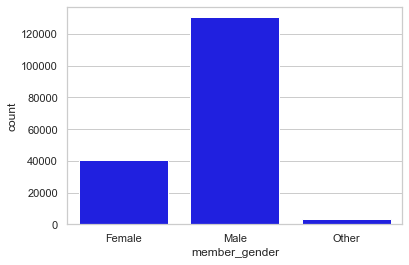

In [18]:
sns.countplot(x=df["member_gender"], color='blue');

#### Observation
> Based on the figure presented, it is evident that the majority of individuals participating in the bike-sharing program are male, with over 120,000 male riders recorded. The number of female riders, on the other hand, is just slightly above 40,000.

#### Question2
What is the number of riders that did share their bikes in the competition?

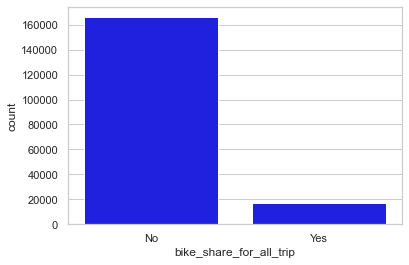

In [19]:
# Countplot to show the number of riders that shared their bikes in the bike sharing competition
sns.countplot(data = df, x=df["bike_share_for_all_trip"], color="blue");

#### Observation
> According to the above figure, the majority of riders did not engage in bike sharing during their trips, with over 160,000 individuals opting not to share their bikes. In comparison, the number of individuals who did share their bikes was below 20,000.

#### Question 1
What is the distribution of the duration of the trips in seconds

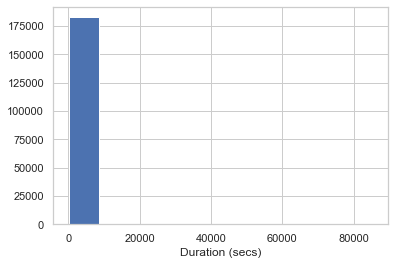

In [20]:
# Lets take a look at the distribution of the duration of the trips 
plt.figure(figsize=[6, 4])
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration (secs)')
plt.show()

> The distribution plot will be represented on a logarithmic scale because the original plot exhibits a tail that is difficult to perceive.

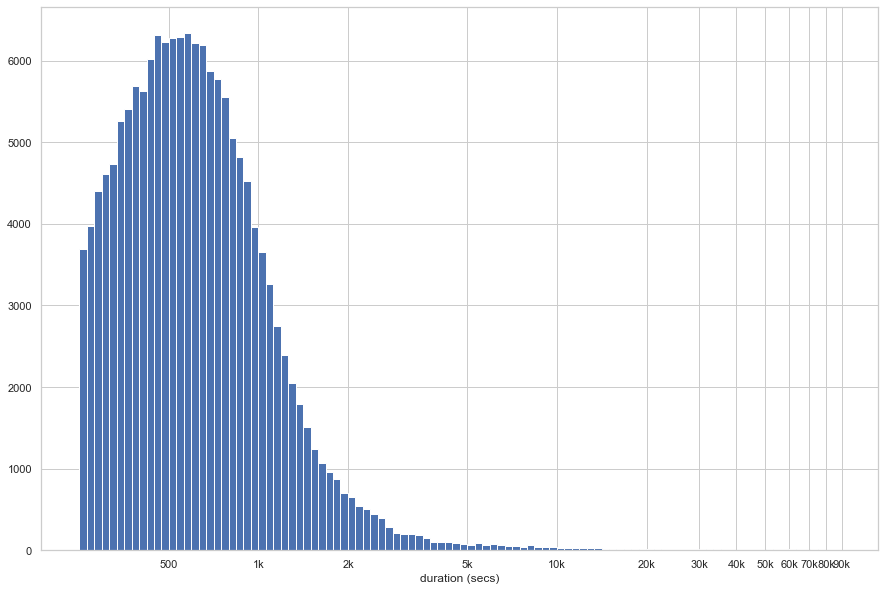

In [21]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 10])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 9e4], [500, '1k', '2k', '5k', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k'])
plt.xlabel('duration (secs)')
plt.show()

#### Observation

> The duration of the trips follows a long-tailed distribution that is skewed to the right, with the majority of trips having relatively short durations and very few taking an extended period of time. On a logarithmic scale, the distribution of trip durations appears to have a mode between 500 and 1000 seconds.

#### Question 4
What is the distribution of the start hour of the trips?

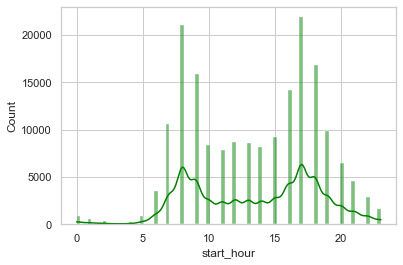

In [22]:
sns.histplot(data=df, x="start_hour", color="green", kde=True);

#### Observations
> The graph exhibits two noticeable peaks, with the majority of trips beginning around 8am in the morning and 5pm in the evening. This trend could be attributed to individuals having varying preferences for when they choose to ride, which may be influenced by the nature of their jobs or other factors.

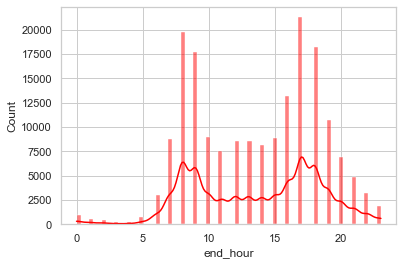

In [23]:
sns.histplot(data=df, x="end_hour", color='red', kde=True);

#### Observation
> The graph reveals two distinct peaks, indicating that the majority of trips ended around 8am in the morning and 5pm in the evening. This plot is consistent with the previous ones and further confirms that most trips were completed within an hour.

#### Question 5
What is the distinction between the user_types?

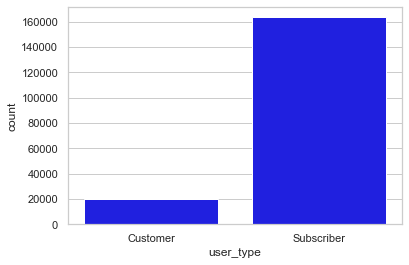

In [24]:
sns.countplot(data = df, x=df["user_type"], color="blue");

#### Observation
> The figure presented above illustrates that the majority of users are subscribers, with over 160,000 individuals being subscribed to the bike-sharing program. This indicates that only a small percentage of the riders are customers.

#### Question 6
What is the frequncy of the days the rides took off?

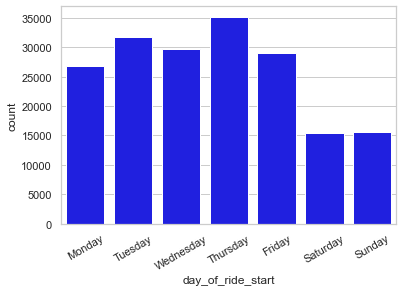

In [25]:
# Countplot to show the frequency of the day of week the rides took off
ax = sns.countplot(x=df["day_of_ride_start"], color="blue", order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis="x", rotation=30);

#### Observation
> As depicted in the figure above, the majority of trips began during the weekdays, while the number of participants was lower on weekends.

#### Question 7
What is the distribution of the speed in miles per hour?

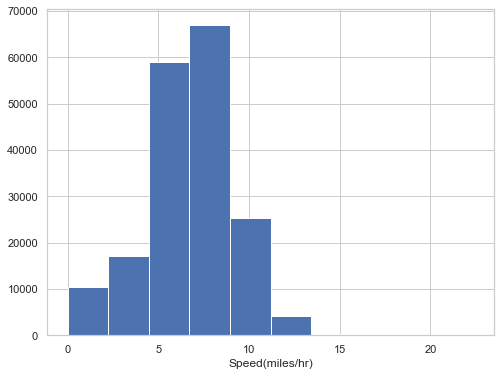

In [26]:
#Checking the distribution of the speed of the journeys in miles per hour
plt.figure(figsize=[8, 6])
plt.hist(data = df, x = 'speed_mph')
plt.xlabel('Speed(miles/hr)')
plt.show()

#### Observation
> The histogram depicted above exhibits a pattern of rising and falling counts as speed increases, with peaks between five and ten miles per hour. This suggests that the majority of riders travelled at speeds within this range during their journey between stations.

#### Question 8 
What is the distribution of the age of the riders?

<AxesSubplot:xlabel='member_age', ylabel='Count'>

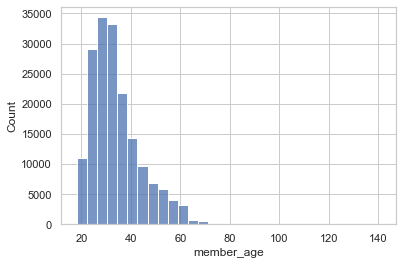

In [27]:
sns.histplot(data=df, x="member_age", bins=30)

#### Observation
> The histogram plot displayed above illustrates the distribution of the age of the riders who participated in the bike-sharing program. It is evident that the majority of riders were between the ages of 20 and 40.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

"Duration has a long-tailed distribution skewed to the right" means that the majority of observations have a relatively short duration, while a few observations have an extremely long duration, resulting in a right-skewed distribution. A log-scale plot is a visualization technique that scales the values on the y-axis logarithmically, making it easier to visualize the data when there are significant differences in the values. The mode of the duration distribution falling between 500 and 1000 seconds on a log-scale plot indicates that most of the observations lie in this range.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

It's a good observation that an outlier in the dataset can significantly affect the mean age and can lead to misleading interpretations. It's important to remove such outliers before performing any statistical analysis.

Regarding the fact that the majority of the riders did not "share their bikes", it might be because bike-sharing programs have different types of services, including the option for riders to rent a bike for their personal use without sharing it with anyone else. Therefore, it's possible that the majority of the riders opted for this service rather than the bike-sharing option.

## Bivariate Exploration

In [28]:
numeric_vars = ['duration_sec', 'distance_miles', "speed_mph", "member_age"]
categoric_vars = ['user_type', 'member_gender', ' bike_share_for_all_trip']

#### Question 9
What are the correlations between the numeric variables?

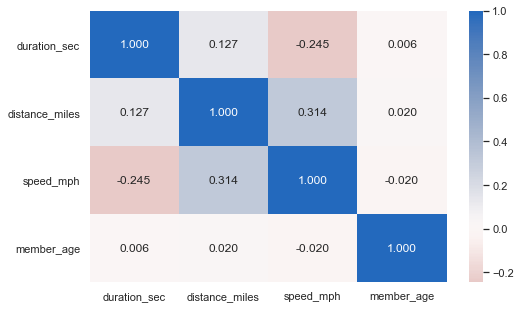

In [29]:
# correlation plot to have an overview of how the numeric features are correlated
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

#### Observations
> According to the heat map, there is a stronger negative correlation between time in seconds and speed in miles per hour. This makes reasonable because a journey's duration should decrease as speed increases. The strongest positive association was between distance iles and speed mph because as speed increases, so does the distance covered.

#### Question 10
What is the relationship between the speed and age of the members?

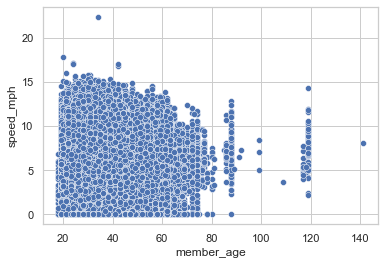

In [30]:
# Using a Scatter plot to examine the relationship between the speed and the age of the members
sns.scatterplot(data=df, x="member_age", y="speed_mph");

#### Observation
> A significant cluster can be seen on the scatterplot's lower left-hand side. This indicates that the majority of riders are under 80 years old and that the majority did not ride at a speed higher than 15 mph.

#### Pairplot to get an overview of the relationships between the numerical variables

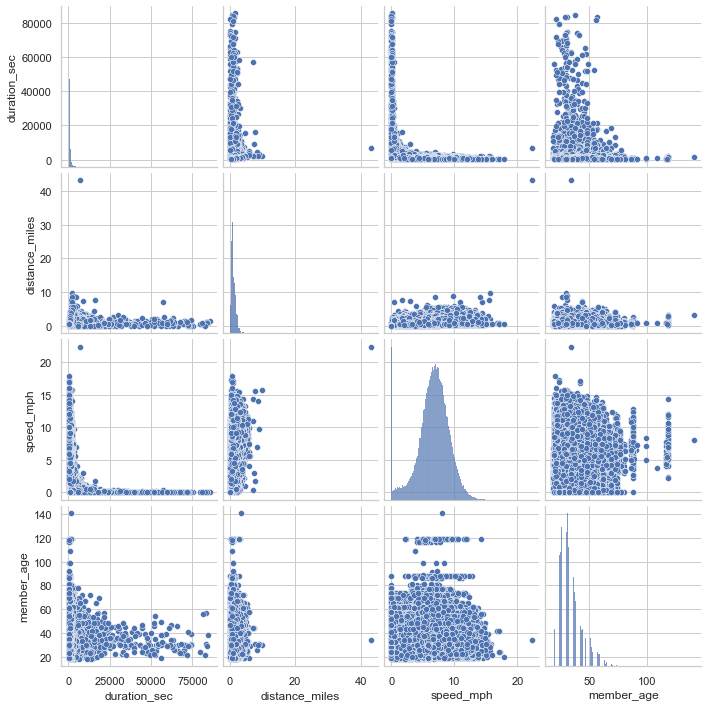

In [31]:
sns.pairplot(df, vars = numeric_vars);

#### Question 11
What is the relatioship between distance covered and the ages of the participants?

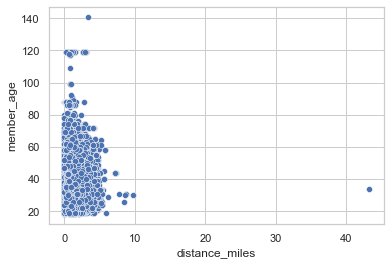

In [32]:
# Using a Scatter plot to examine the relationship between the distance covered and the age of the members
sns.scatterplot(data=df, x="distance_miles", y="member_age");

In [33]:
df["distance_miles"].max() # This distance is an outlier.

43.16624451359244

>An outlier in the distance(miles) column is affecting our visualization and will raise the mean of the the group.

In [34]:
df.drop(index=df.loc[df['distance_miles'] == 43.16624451359153].index, inplace=True)

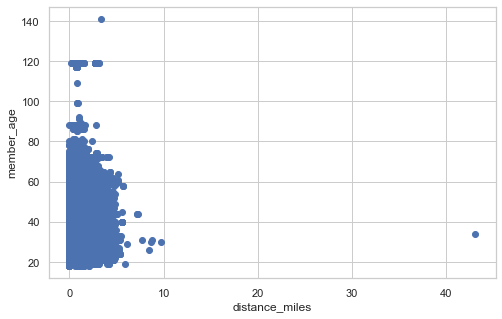

In [35]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'distance_miles', y='member_age')
plt.xlabel("distance_miles")
plt.ylabel("member_age")
plt.show();

#### Observation
> A significant cluster can be seen on the scatterplot's lower left-hand side. This indicates that the majority of the riders are under 80 years old and that the majority did not bike more than 5 km.

#### Question 12
What is the relationship between duration and speed?

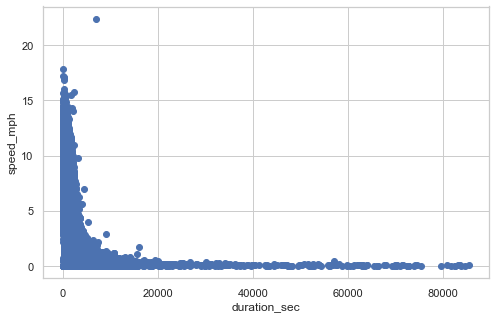

In [36]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'duration_sec', y='speed_mph')
plt.xlabel("duration_sec")
plt.ylabel("speed_mph")
plt.show();

#### Observation
> This shows negative correlation explained earlier with lower speed resulting in longer time spent

#### Question 13
What is the relationship between duration and member age?

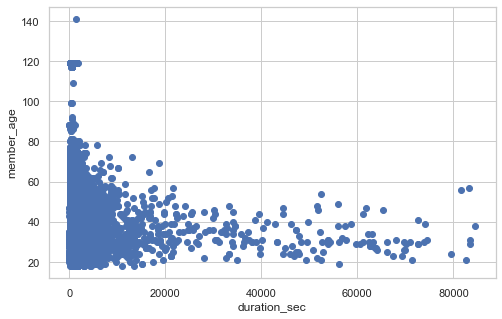

In [37]:
# Visualizing Again after removing outlier
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x = 'duration_sec', y='member_age')
plt.xlabel("duration_sec")
plt.ylabel("member_age")
plt.show();

#### Observation
> From the scatterplot above, some of the younger riders spent more time on the journey but the majority of the points are clustered on the lower left hand side of the plot

#### Question 14
what is the relationship between User type and the age of the member?

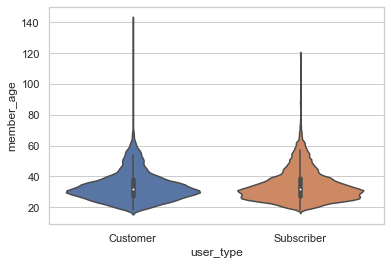

In [38]:
# Examining the relationship between User type and the age of the member
sns.violinplot(data=df, x="user_type", y="member_age");

#### Observation
> The mean of the ages is slightly higher in the customer user type category and has a higher range of values than the subscriber user type.

#### Question 15
What is the relationship between the speed and the gender of the member?

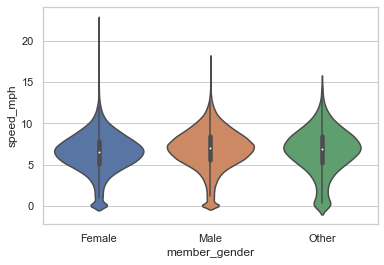

In [39]:
# Examining the relationship between the speed and the gender of the member
sns.violinplot(data=df, x="member_gender", y="speed_mph");

#### Observation
> When it comes to the mean, from the violin plot above, the male gender have a higher mean when it comes to speed in miles/hr. majority of the riders clocked in at 5 - 10 miles/hr across genders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The relationship between duration and speed is a crucial consideration in transportation and logistics. Generally, a higher speed leads to a shorter journey duration, indicating a negative correlation between the two variables. It's essential to keep in mind, though, that correlation doesn't necessarily imply causation. Just because two variables are correlated doesn't mean that one causes the other. Other factors, like traffic, road conditions, and mode of transportation, can impact both speed and duration. The scatter plots show that younger riders took longer on their journeys. Also, there was a positive correlation between distance traveled and journey duration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

On the other hand, a positive correlation between distance in miles and speed in miles per hour indicates that as the speed increases, the distance covered during the journey increases as well.

## Multivariate Exploration

#### Question 16
What is the relationship between duration, bikes_hare, user type and the day of ride start?

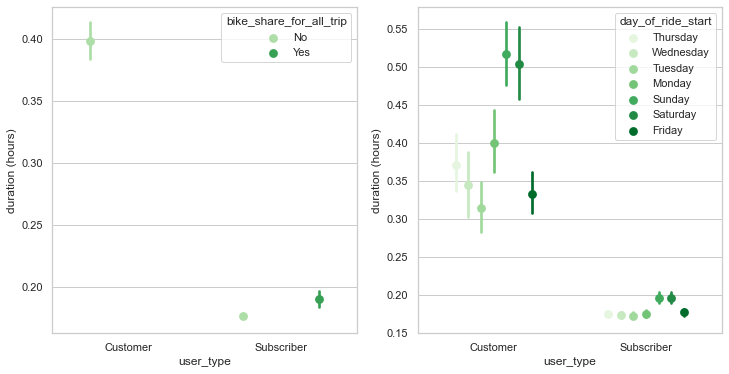

In [40]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sns.pointplot(data = df, x = 'user_type', y = 'duration_hrs', hue = 'bike_share_for_all_trip',
             palette = 'Greens', linestyles = '', dodge = 0.5, ax = ax[0])
ax[0].set_title('')
ax[0].set_ylabel('duration (hours)')

sns.pointplot(data = df, x = 'user_type', y = 'duration_hrs', hue = 'day_of_ride_start',
             palette = 'Greens', linestyles = '', dodge = 0.5, ax = ax[1])
ax[1].set_title('')
ax[1].set_ylabel("duration (hours)")

plt.show();

#### Obsevation
> One important finding from the plots above is that users using day-of-trip bike sharing features typically clocked in at shorter times.

#### Further investigate the relationship between member gender, user type and speed_mph using a facet grid

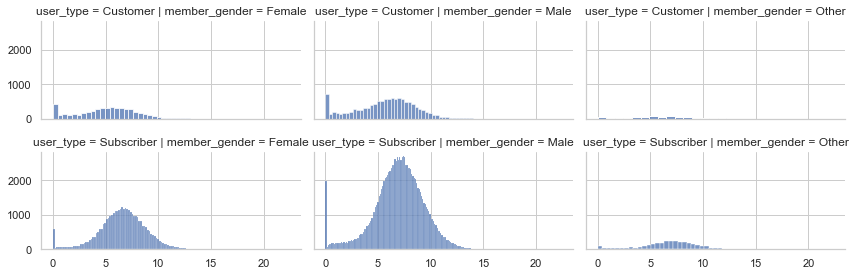

In [41]:
g = sns.FacetGrid(df, col="member_gender",  row="user_type", height=2, aspect=2, legend_out=False)
g.map_dataframe(sns.histplot, x="speed_mph")


#### Observation
> The speed distribution in miles per hour for subscriber users appears to follow a normal distribution, indicating that the mean, median, and mode of the values are nearly equal.

#### Using facetgrid to understand the releationship between User_type, member_age and speed_mph.

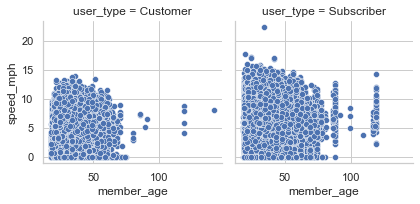

In [42]:
g = sns.FacetGrid(df, col="user_type")
g.map(sns.scatterplot, "member_age", "speed_mph")

#### Observation
> The graph shows that subscribers have more data points and a greater number of individuals recorded as being over 100 years of age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Taking a look at my feature of interest which is duration, the major influence  on the duration of the trips i would say is the distance between stations and the speed taken for the journey.

### Were there any interesting or surprising interactions between features?

One interesting observation in the dataset is that some of the younger riders spent more time on the journey as opposed to the the older riders who spent less time between stations.

## Conclusions
* Thursdays and Tuesdays were the most popular days for trips, while weekends had the lowest number of trip records.

* The busiest times for trips were during rush hour, with the highest number of trips occurring in the morning (between 8 and 9 am) and in the evening (between 5 and 6 pm).

* Subscribers accounted for about 90% of all trips in the dataset, which covers only February and March of 2019.

* The majority of trips were taken by males (over 70%).

* Females tended to have longer trip durations than males.

* Weekend trips had longer durations than trips on other weekdays.

* On average, the duration for all trips was approximately 500 seconds.

* Less than 10% of all trips involved bike sharing.
